### Exploratory Data Analysis (Yi)

#### Import Libaries

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statistics
%matplotlib inline

#### Load Data

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
ames_df = pd.read_csv('data/final_df.csv', index_col = 0)
ames_df.shape

(2603, 179)

#### Remove duplicates and unused columns

In [4]:
ames_df = ames_df.drop_duplicates(subset=['PID'],keep = 'first')
ames_df.shape

(2558, 179)

In [5]:
ames_df = ames_df.drop(
    ['PA-PreD','PA-PostD','PA-UnTyp','PA-UntNo','X1TPr_D','X1TSc_D','Rcrd_Mo','Legal_Pr','TxD_S',\
    'X2TPr_D','X2TSc_D','X1TPr_S','X1TSc_S','X2TPr_S','X2TSc_S','ISU_lat_long','address','MA_Ownr1','MA_Ownr2',\
    'MA_Line1','MA_Line2','MA_City','MA_State','address3','location2','point2','SaleCond','Source','Date',\
    'ParType','BldgNo_S','DwlgNo_S','YrBuilt','Ext1','Ext2','GLA','GarYrBlt','Cars','MA_Zip1','MA_Zip2',\
    'ZngCdPr','ZngCdSc','ZngOLPr','ZngOLSc','PA-Nmbr','PA-Strt','PA-StSfx','Inst1_No','Inst1_Yr','Inst1_Mo',\
    'Inst1TPr','TtlVal_AsrYr','ValType','OthAc_S','ImpAc_S','LndAc_S','Prop_Addr','HSTtl_D','MilVal_D',\
    'HSTtl_S','MilVal_S','GeoRefNo','Tier','Range','AcreX_S1','ClassPr_S','ClassSc_S','LndAcX1S','ImpAcX1S',\
    'Central Air','ImpAcX2S','AcreGr','AcreNt_S','ParclRel','Rcrd_Yr','address2',\
    'latitude2','longitude2','ISU_lat','ISU_long','altitude2','Central Air'], axis=1)
ames_df.shape

(2558, 98)

In [6]:
ames_df.columns[0:29]

Index(['index', 'PID', 'GrLivArea', 'SalePrice', 'Distance', 'MSSubClass',
       'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd'],
      dtype='object')

#### EDA

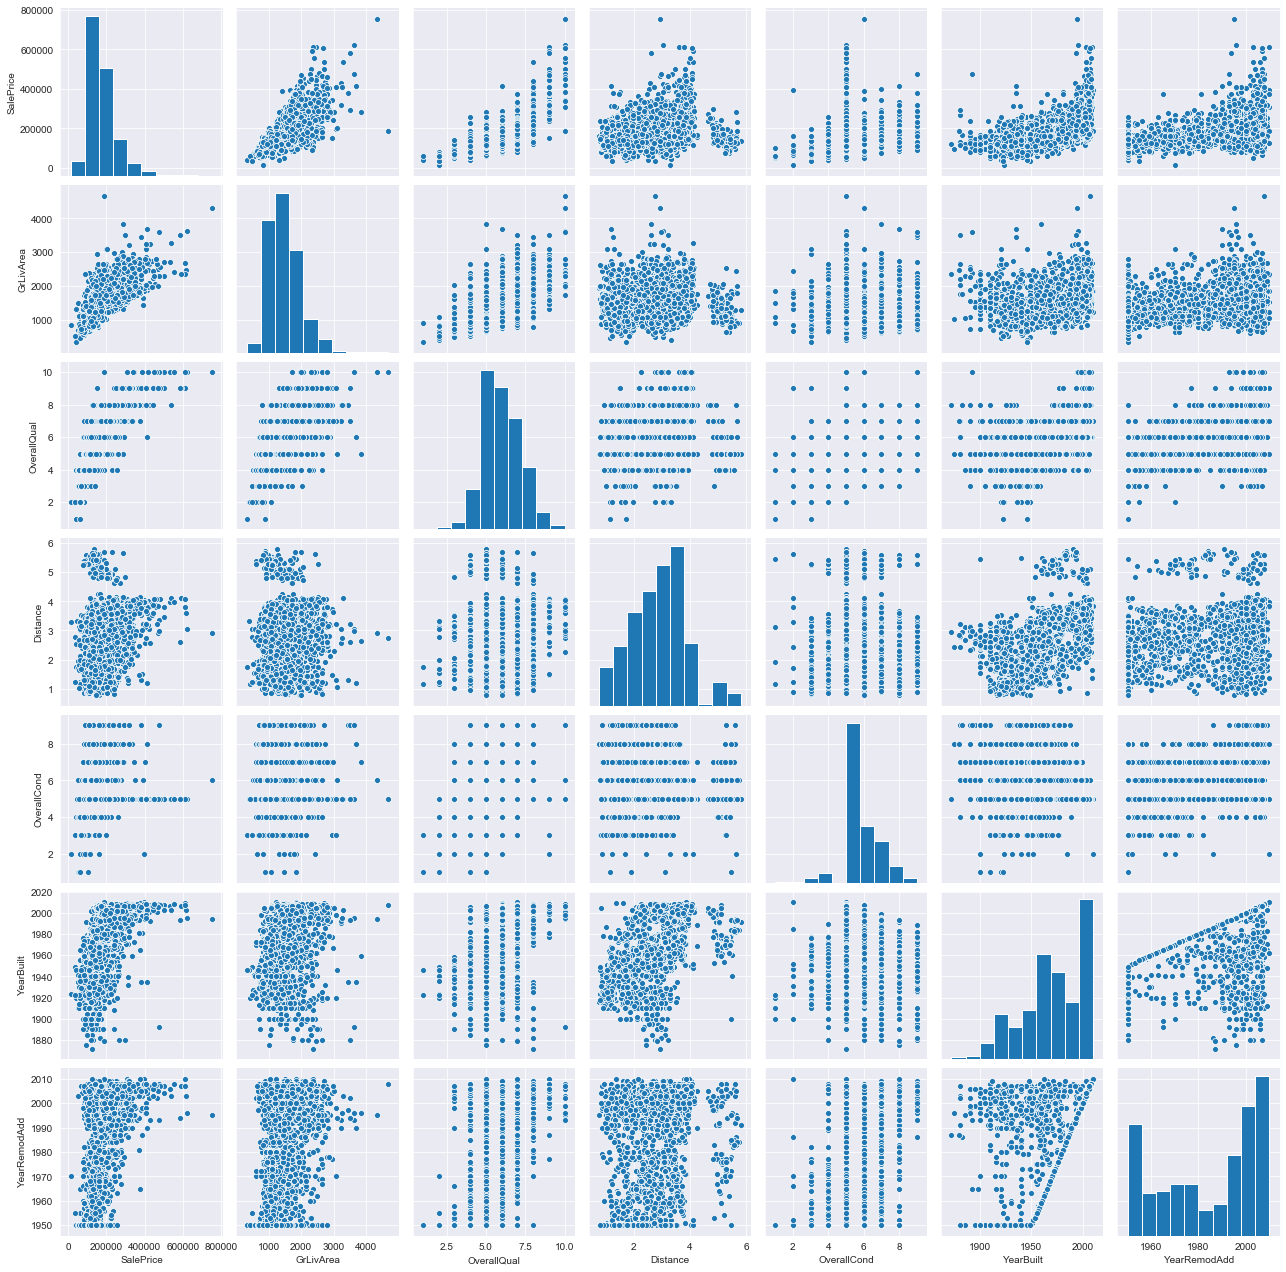

In [7]:
sns.set_style("darkgrid")
ames_df_num = ames_df[['SalePrice','GrLivArea','OverallQual','Distance','OverallCond','YearBuilt','YearRemodAdd']]
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="")
sns.pairplot(ames_df_num)

SalePrice (output var)

In [8]:
sum(pd.isnull(ames_df['SalePrice']))

0

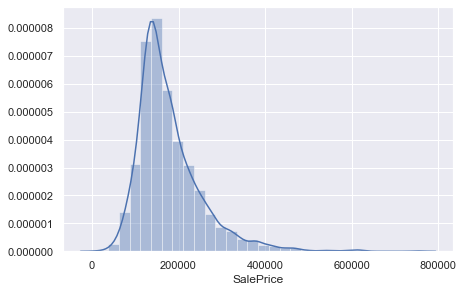

In [9]:
sns.set(rc={'figure.figsize':(7, 4.5)})
X = ames_df['SalePrice']
sns.distplot(X, bins = 30)

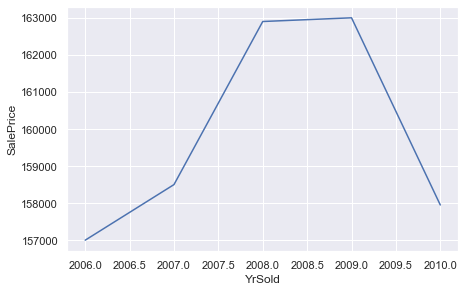

In [10]:
# median sale price by year sold
MedPr_YrSold = ames_df.groupby('YrSold')[['SalePrice']].median().reset_index()
#plt.ylim(0, 200000)
sns.lineplot(MedPr_YrSold['YrSold'], MedPr_YrSold['SalePrice'])

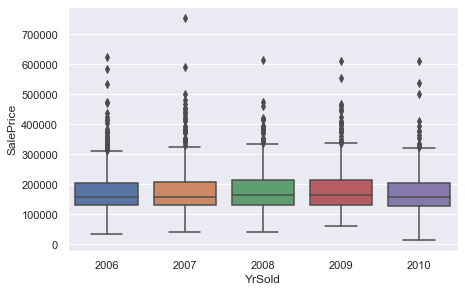

In [11]:
X = ames_df['YrSold']
Y = ames_df['SalePrice']
sns.boxplot(X, Y)

GrLivArea (log transf)

In [12]:
sum(pd.isnull(ames_df['GrLivArea']))

0

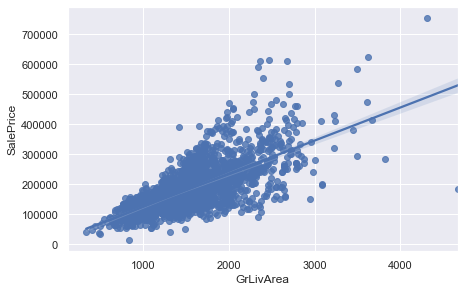

In [13]:
X = ames_df['GrLivArea']
Y = ames_df['SalePrice']
sns.regplot(X, Y)

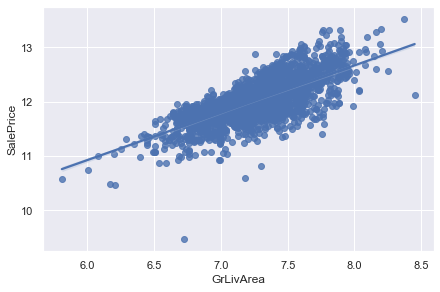

In [14]:
X = np.log(ames_df['GrLivArea']) 
Y = np.log(ames_df['SalePrice'])
sns.regplot(X, Y)
# x_estimator=np.mean

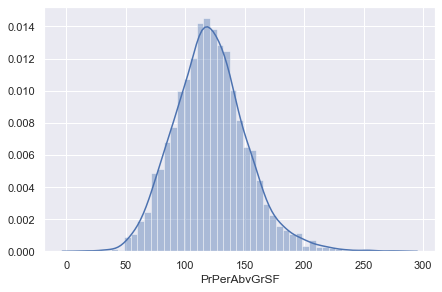

In [15]:
# price per above ground living sq ft
ames_df['PrPerAbvGrSF'] = ames_df['SalePrice']/ames_df['GrLivArea']
sns.distplot(ames_df['PrPerAbvGrSF'])

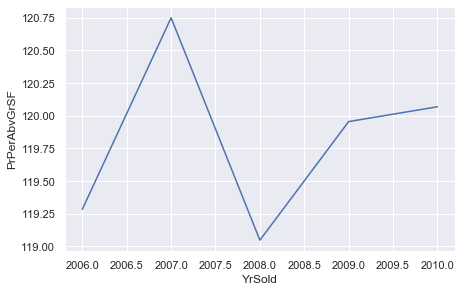

In [16]:
# price per above ground living sqft over time
MedPrPerAbvGrSF = ames_df.groupby('YrSold')[['PrPerAbvGrSF']].median().reset_index()
#plt.ylim(0, 125)
sns.lineplot(MedPrPerAbvGrSF['YrSold'], MedPrPerAbvGrSF['PrPerAbvGrSF'])

LotFrontage (to binarize)

In [17]:
# 458 samples don't have any lot frontage
sum(pd.isnull(ames_df['LotFrontage']))

458

In [18]:
# fill nulls with 0s
ames_df['LotFrontage'] = ames_df['LotFrontage'].fillna(0)

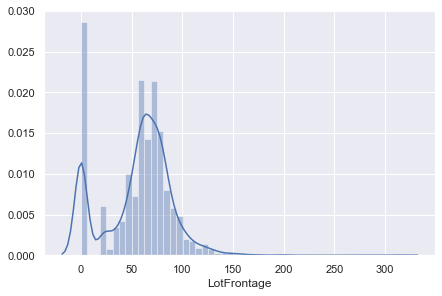

In [19]:
sns.distplot(ames_df['LotFrontage'])

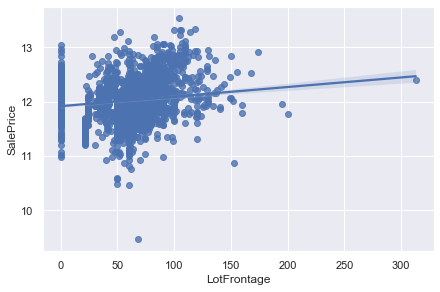

In [20]:
X = ames_df['LotFrontage']
Y = np.log(ames_df['SalePrice'])
sns.regplot(X, Y)

LotArea (log transf)

In [21]:
sum(pd.isnull(ames_df['LotArea']))

0

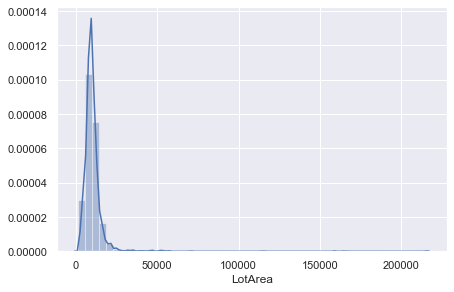

In [22]:
sns.distplot(ames_df['LotArea'])

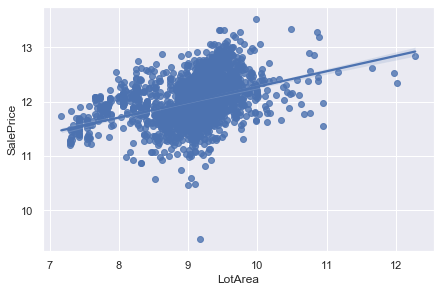

In [23]:
X = np.log(ames_df['LotArea'])
Y = np.log(ames_df['SalePrice'])
sns.regplot(X, Y)

OverallQual

In [24]:
sum(pd.isnull(ames_df['OverallQual']))

0

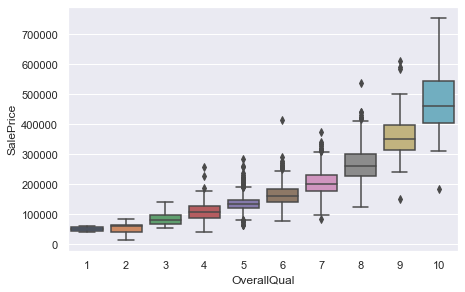

In [25]:
sns.boxplot(x='OverallQual', y= 'SalePrice', data = ames_df)

In [26]:
(ames_df.groupby('OverallQual')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
OverallQual,
5,0.292807
6,0.259969
7,0.203284
8,0.113370
4,0.074668
9,0.030884
3,0.012510
10,0.007428
2,0.004300


OverallCond

In [27]:
sum(pd.isnull(ames_df['OverallCond']))

0

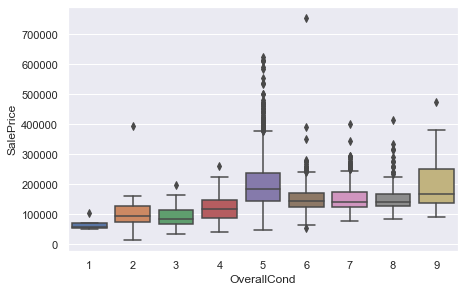

In [28]:
sns.boxplot(x='OverallCond', y= 'SalePrice', data = ames_df)

In [29]:
(ames_df.groupby('OverallCond')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
OverallCond,
5,0.544175
6,0.193120
7,0.139953
8,0.054730
4,0.033229
9,0.015246
3,0.014855
2,0.003127
1,0.001564


YearBuilt (to convert to building age)

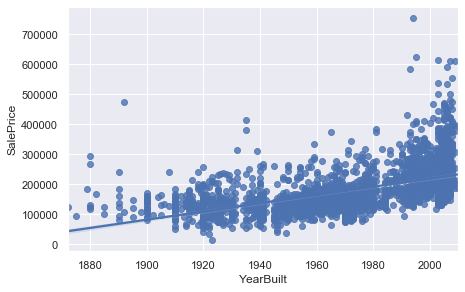

In [30]:
X = ames_df['YearBuilt']
Y = ames_df['SalePrice']
sns.regplot(X, Y)

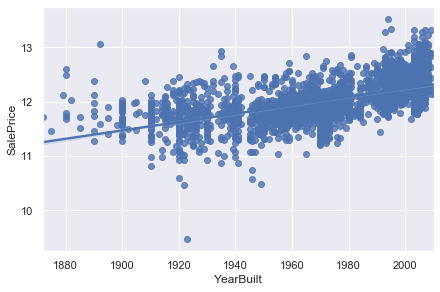

In [31]:
X = ames_df['YearBuilt']
Y = np.log(ames_df['SalePrice'])
sns.regplot(X, Y)

In [32]:
# count by year built
CntPerYrBlt = pd.DataFrame(ames_df['YearBuilt'].value_counts()).reset_index().set_index('index')
CntPerYrBlt.T

index,2005,2004,2003,2006,2007,1977,1999,2002,2000,1920,1976,1998,1978,1968,1959,1954,1958,1972,1967,1910,1993,1970,1994,1971,1960,1950,1956,1940,1962,2001,2008,1966,1997,1996,1963,1957,1964,1925,1955,1961,1995,1965,1980,1992,1969,1900,1948,1975,1930,1953,1941,1915,1939,1973,1990,1974,1926,1949,1984,1923,1951,1988,1979,1952,1922,1924,1946,1945,1938,1991,1935,1936,1981,1947,1921,1918,1928,2009,1986,1937,1927,1989,1916,1983,1929,1890,1987,1914,1982,1985,1931,1880,1932,1942,1934,1919,1905,1917,1895,1912,1885,1908,2010,1892,1898,1882,1879,1875,1902,1904,1906,1913,1872
YearBuilt,109,96,85,80,63,55,51,47,47,47,47,44,41,41,41,40,39,39,39,38,38,38,37,37,36,35,34,34,34,34,33,33,33,33,32,32,31,31,30,30,30,29,27,26,25,24,24,23,22,22,21,20,20,20,19,19,19,17,17,15,15,14,14,14,14,13,12,12,11,11,11,10,10,10,10,9,9,9,9,8,8,8,8,8,8,7,7,7,7,6,6,5,4,4,4,4,3,3,3,3,2,2,2,2,1,1,1,1,1,1,1,1,1


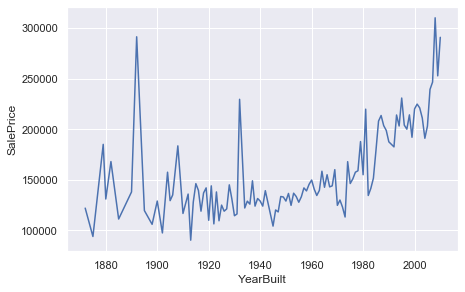

In [33]:
MedPrByYrBlt = ames_df.groupby('YearBuilt')[['SalePrice']].median().reset_index()
sns.lineplot(MedPrByYrBlt['YearBuilt'], MedPrByYrBlt['SalePrice'])

YearRemodAdd (to binarize)

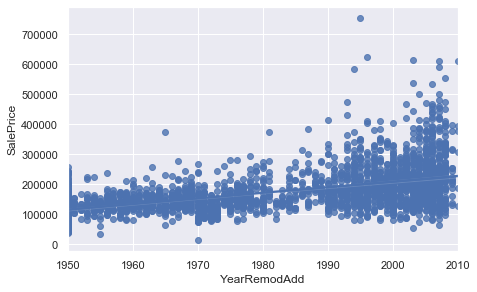

In [34]:
X = ames_df['YearRemodAdd']
Y = ames_df['SalePrice']
sns.regplot(X, Y)

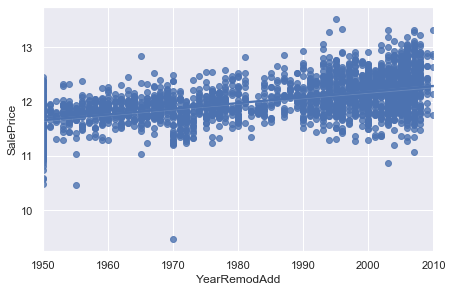

In [35]:
X = ames_df['YearRemodAdd']
Y = np.log(ames_df['SalePrice'])
sns.regplot(X, Y)

MSSubClass

In [36]:
sum(pd.isnull(ames_df['MSSubClass']))

0

In [37]:
np.unique(ames_df['MSSubClass'])

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 150,
       160, 180, 190], dtype=int64)

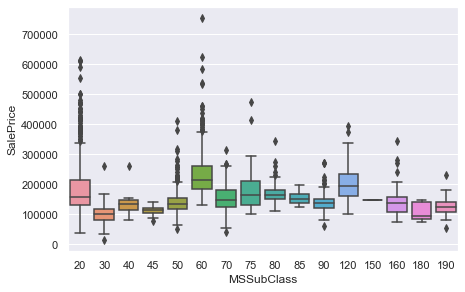

In [38]:
sns.boxplot(x='MSSubClass', y= 'SalePrice', data = ames_df)

In [39]:
(ames_df.groupby('MSSubClass')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
MSSubClass,
20,0.365129
60,0.195856
50,0.098905
120,0.065285
30,0.046521
160,0.046521
70,0.044957
80,0.042220
90,0.034011


MSZoning

In [40]:
sum(pd.isnull(ames_df['MSZoning']))

0

In [41]:
np.unique(ames_df['MSZoning'])

array(['C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'], dtype=object)

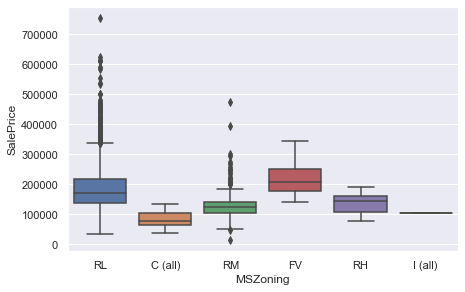

In [42]:
sns.boxplot(x='MSZoning', y= 'SalePrice', data = ames_df)

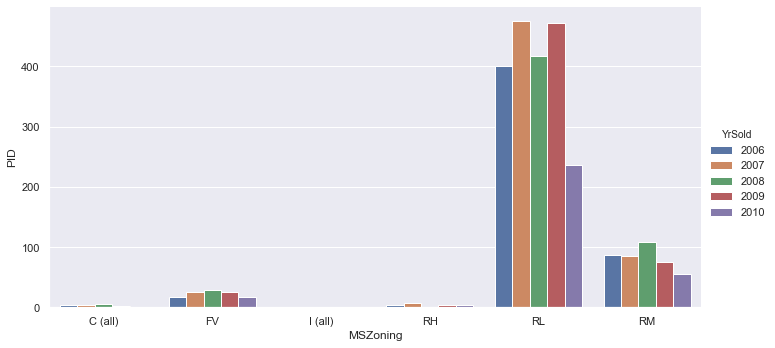

In [43]:
Cnt_MSZ = ames_df.groupby(['MSZoning','YrSold']).count()[['PID']].reset_index()
sns.catplot(x='MSZoning', y= 'PID', hue = 'YrSold', kind = 'bar', data = Cnt_MSZ, height = 5, aspect = 2)

In [44]:
(ames_df.groupby('MSZoning')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
MSZoning,
RL,0.781861
RM,0.160672
FV,0.044175
RH,0.007037
C (all),0.005864
I (all),0.000391


Street (to remove: <30 in the minority class)

In [45]:
sum(pd.isnull(ames_df['Street']))

0

In [46]:
np.unique(ames_df['Street'])

array(['Grvl', 'Pave'], dtype=object)

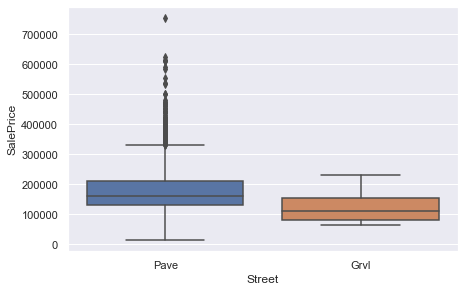

In [47]:
sns.set(rc={'figure.figsize':(7, 4.5)})
sns.boxplot(x='Street', y= 'SalePrice', data = ames_df)

In [48]:
(ames_df.groupby('Street')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Street,
Pave,0.996482
Grvl,0.003518


Alley (to binarize)

In [49]:
sum(pd.isnull(ames_df['Alley']))

2392

In [50]:
set(ames_df['Street'])

{'Grvl', 'Pave'}

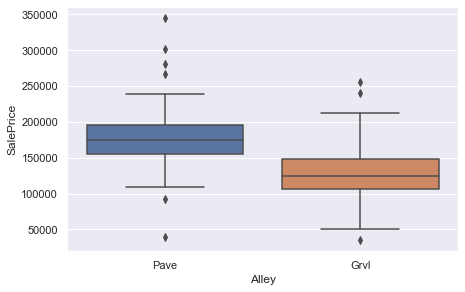

In [51]:
sns.boxplot(x='Alley', y= 'SalePrice', data = ames_df)

In [52]:
(ames_df.groupby('Alley')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Alley,
Grvl,0.040657
Pave,0.024238


LotShape

In [53]:
sum(pd.isnull(ames_df['LotShape']))

0

In [54]:
set(ames_df['LotShape'])

{'IR1', 'IR2', 'IR3', 'Reg'}

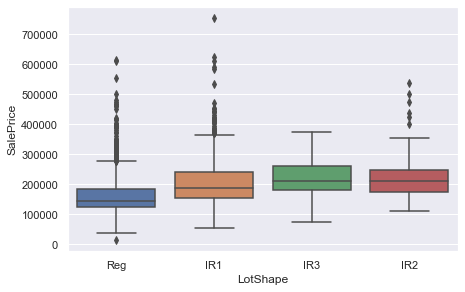

In [55]:
sns.boxplot(x='LotShape', y= 'SalePrice', data = ames_df)

In [56]:
(ames_df.groupby('LotShape')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
LotShape,
Reg,0.635653
IR1,0.331900
IR2,0.027365
IR3,0.005082


LandContour

In [57]:
sum(pd.isnull(ames_df['LandContour']))

0

In [58]:
set(ames_df['LandContour'])

{'Bnk', 'HLS', 'Low', 'Lvl'}

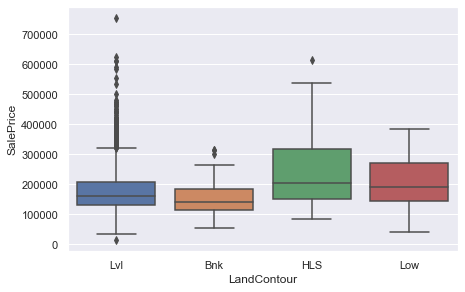

In [59]:
sns.boxplot(x='LandContour', y= 'SalePrice', data = ames_df)

In [60]:
(ames_df.groupby('LandContour')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
LandContour,
Lvl,0.906568
Bnk,0.036747
HLS,0.036747
Low,0.019937


Utilities (to remove: <30 samples in the minority class)

In [61]:
sum(pd.isnull(ames_df['Utilities']))

0

In [62]:
set(ames_df['Utilities'])

{'AllPub', 'NoSewr'}

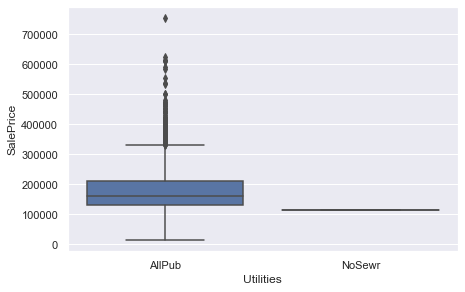

In [63]:
sns.boxplot(x='Utilities', y= 'SalePrice', data = ames_df)

In [64]:
(ames_df.groupby('Utilities')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Utilities,
AllPub,0.999609
NoSewr,0.000391


LotConfig

In [65]:
sum(pd.isnull(ames_df['LotConfig']))

0

In [66]:
set(ames_df['LotConfig'])

{'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'}

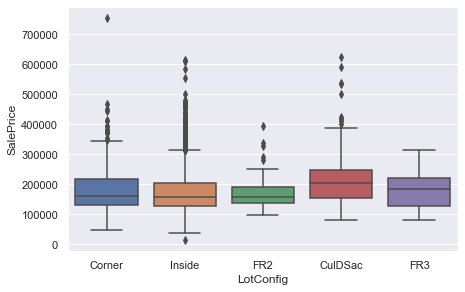

In [67]:
sns.boxplot(x='LotConfig', y= 'SalePrice', data = ames_df)

In [68]:
(ames_df.groupby('LotConfig')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
LotConfig,
Inside,0.730649
Corner,0.170055
CulDSac,0.063722
FR2,0.030493
FR3,0.005082


LandSlope

In [69]:
sum(pd.isnull(ames_df['LandSlope']))

0

In [70]:
set(ames_df['LandSlope'])

{'Gtl', 'Mod', 'Sev'}

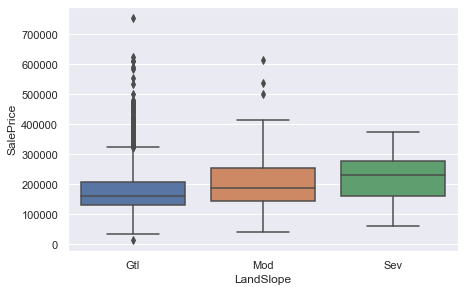

In [71]:
sns.boxplot(x='LandSlope', y= 'SalePrice', data = ames_df)

In [72]:
(ames_df.groupby('LandSlope')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
LandSlope,
Gtl,0.953479
Mod,0.041439
Sev,0.005082


Neighborhood (to use a proxy)

In [73]:
sum(pd.isnull(ames_df['Neighborhood']))

0

In [74]:
print(set(ames_df['Neighborhood']))

{'NoRidge', 'BrkSide', 'NAmes', 'NridgHt', 'Gilbert', 'Greens', 'ClearCr', 'Veenker', 'Blueste', 'BrDale', 'Blmngtn', 'Somerst', 'StoneBr', 'Sawyer', 'Crawfor', 'IDOTRR', 'NWAmes', 'Mitchel', 'Edwards', 'CollgCr', 'Timber', 'NPkVill', 'MeadowV', 'OldTown', 'SawyerW', 'SWISU'}


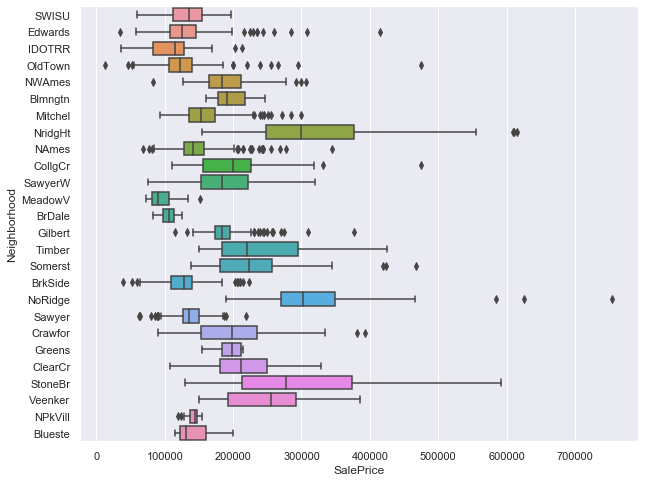

In [75]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='SalePrice', y= 'Neighborhood', data = ames_df)

In [76]:
(ames_df.groupby('Neighborhood')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Neighborhood,
NAmes,0.159500
CollgCr,0.092260
OldTown,0.081314
Edwards,0.063722
Somerst,0.055903
Gilbert,0.055903
Sawyer,0.054339
NWAmes,0.048084
NridgHt,0.047303


Condition 1 and Condition 2 (to simplify)

In [77]:
print(set(ames_df['Condition1']))
print(set(ames_df['Condition2']))

{'RRAn', 'RRNe', 'PosN', 'PosA', 'RRNn', 'Feedr', 'RRAe', 'Norm', 'Artery'}
{'RRAn', 'PosN', 'PosA', 'RRNn', 'Feedr', 'RRAe', 'Norm', 'Artery'}


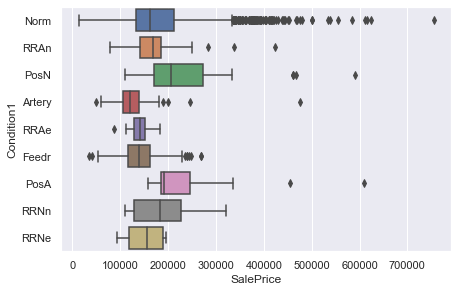

In [78]:
sns.set(rc={'figure.figsize':(7, 4.5)})
sns.boxplot(x='SalePrice', y= 'Condition1', data = ames_df)

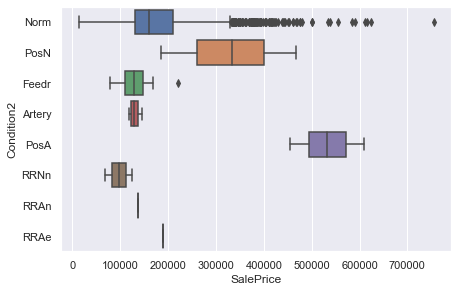

In [79]:
sns.boxplot(x='SalePrice', y= 'Condition2', data = ames_df)

In [80]:
(ames_df.groupby('Condition1')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Condition1,
Norm,0.865129
Feedr,0.052776
Artery,0.029711
RRAn,0.015637
PosN,0.014464
RRAe,0.010164
PosA,0.007428
RRNn,0.003127
RRNe,0.001564


In [81]:
(ames_df.groupby('Condition2')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Condition2,
Norm,0.990618
Feedr,0.004691
Artery,0.001173
PosN,0.001173
PosA,0.000782
RRNn,0.000782
RRAe,0.000391
RRAn,0.000391


BldgType

In [82]:
sum(pd.isnull(ames_df['BldgType']))

0

In [83]:
set(ames_df['BldgType'])

{'1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'}

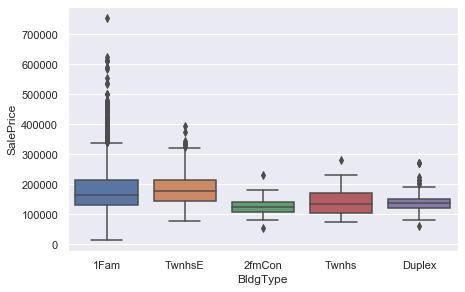

In [84]:
sns.boxplot(x='BldgType', y= 'SalePrice', data = ames_df)

In [85]:
(ames_df.groupby('BldgType')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
BldgType,
1Fam,0.828772
TwnhsE,0.078186
Twnhs,0.037920
Duplex,0.034011
2fmCon,0.021110


HouseStyle

In [86]:
sum(pd.isnull(ames_df['HouseStyle']))

0

In [87]:
set(ames_df['HouseStyle'])

{'1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl'}

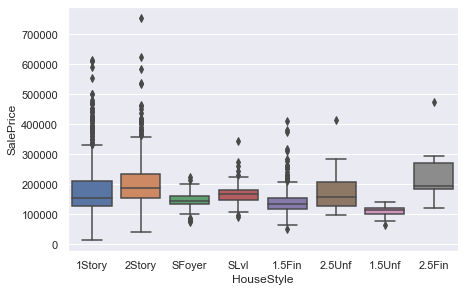

In [88]:
sns.boxplot(x='HouseStyle', y= 'SalePrice', data = ames_df)

In [89]:
(ames_df.groupby('HouseStyle')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
HouseStyle,
1Story,0.499218
2Story,0.301016
1.5Fin,0.108679
SLvl,0.045739
SFoyer,0.027365
2.5Unf,0.008210
1.5Unf,0.007428
2.5Fin,0.002346


RoofStyle

In [90]:
set(ames_df['RoofStyle'])

{'Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'}

In [91]:
sum(pd.isnull(ames_df['RoofStyle']))

0

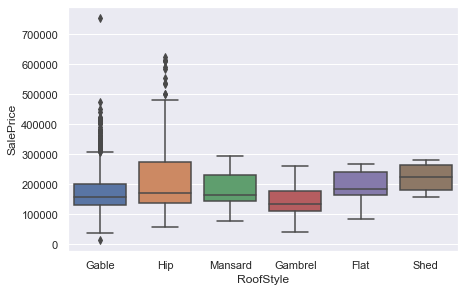

In [92]:
sns.boxplot(x='RoofStyle', y= 'SalePrice', data = ames_df)

In [93]:
(ames_df.groupby('RoofStyle')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
RoofStyle,
Gable,0.797889
Hip,0.183737
Gambrel,0.007037
Flat,0.005864
Mansard,0.003909
Shed,0.001564


RoofMatl (to remove: <30 samples in any minority classes)

In [94]:
sum(pd.isnull(ames_df['RoofMatl']))

0

In [95]:
set(ames_df['RoofMatl'])

{'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'}

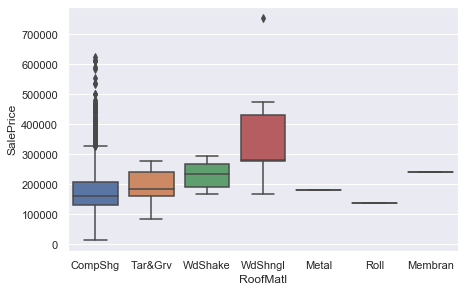

In [96]:
sns.boxplot(x='RoofMatl', y= 'SalePrice', data = ames_df)

In [97]:
(ames_df.groupby('RoofMatl')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
RoofMatl,
CompShg,0.986317
Tar&Grv,0.006646
WdShake,0.003127
WdShngl,0.002737
Membran,0.000391
Metal,0.000391
Roll,0.000391


Exterior1st and Exterior2nd (to simplify)

In [98]:
print(sum(pd.isnull(ames_df['Exterior1st'])))
print(sum(pd.isnull(ames_df['Exterior2nd'])))

0
0


In [99]:
print(set(ames_df['Exterior1st']))
print(set(ames_df['Exterior2nd']))

{'Stucco', 'AsphShn', 'CBlock', 'BrkComm', 'HdBoard', 'PreCast', 'Wd Sdng', 'Plywood', 'CemntBd', 'ImStucc', 'BrkFace', 'WdShing', 'AsbShng', 'VinylSd', 'MetalSd'}
{'Stucco', 'Wd Shng', 'CmentBd', 'CBlock', 'AsphShn', 'HdBoard', 'Stone', 'Brk Cmn', 'PreCast', 'Wd Sdng', 'Plywood', 'ImStucc', 'BrkFace', 'AsbShng', 'VinylSd', 'MetalSd'}


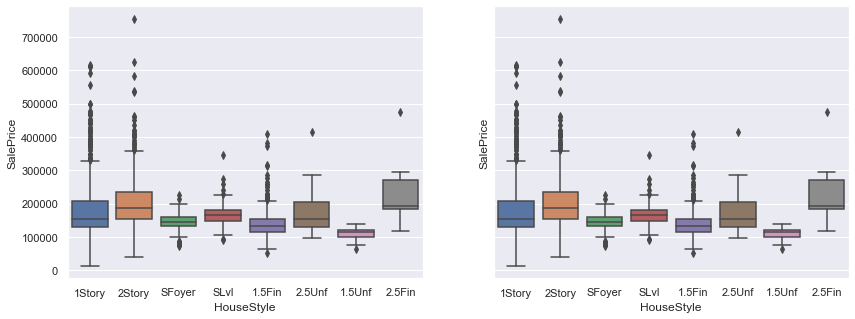

In [100]:
sns.set(rc={'figure.figsize':(14, 5)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(ames_df['HouseStyle'], ames_df['SalePrice'], ax = ax1)
sns.boxplot(ames_df['HouseStyle'], ames_df['SalePrice'], ax = ax2)

In [101]:
(ames_df.groupby('Exterior1st')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Exterior1st,
VinylSd,0.337764
HdBoard,0.162627
MetalSd,0.157936
Wd Sdng,0.146990
Plywood,0.075450
CemntBd,0.037529
BrkFace,0.030884
WdShing,0.019156
Stucco,0.014464


In [102]:
(ames_df.groupby('Exterior2nd')[['PID']].count()/len(ames_df)).sort_values('PID', ascending = False)

,PID
Exterior2nd,
VinylSd,0.333073
MetalSd,0.156763
HdBoard,0.148554
Wd Sdng,0.140344
Plywood,0.092260
CmentBd,0.037529
Wd Shng,0.029320
BrkFace,0.017983
Stucco,0.014073


real estate data dictionary:
https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/reports